# Vetorização de Imagens ( Image Tracing)


### 1. Banco de imagens

Começar por formas simples pra testar e depois vamos complicando,
alguns exemplos que acho que dariam certo :

In [2]:
import numpy as np
np.set_printoptions(threshold=100000)   #permite printar todo o array
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

import skimage.morphology as mm
from skimage.segmentation import watershed, join_segmentations
from skimage.segmentation import mark_boundaries
from skimage.segmentation import find_boundaries

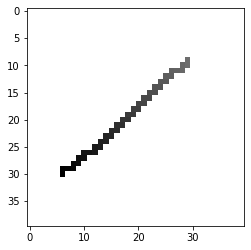

In [126]:
# Abre a imagem exemplo
# desenhei no gimp uma linha numa imagem 40x40 pra ficar simples

line = Image.open('line.png').convert('L')
img = np.array(line)
plt.imshow(img, cmap='gray')

### 2. Detecção de bordas
Revisar os algoritmos que usamos e ver qual se adequa melhor ao nosso objetivo

*estou testando watershed*

Text(0.5, 1.0, 'Imagem segmentada - linha de watershed')

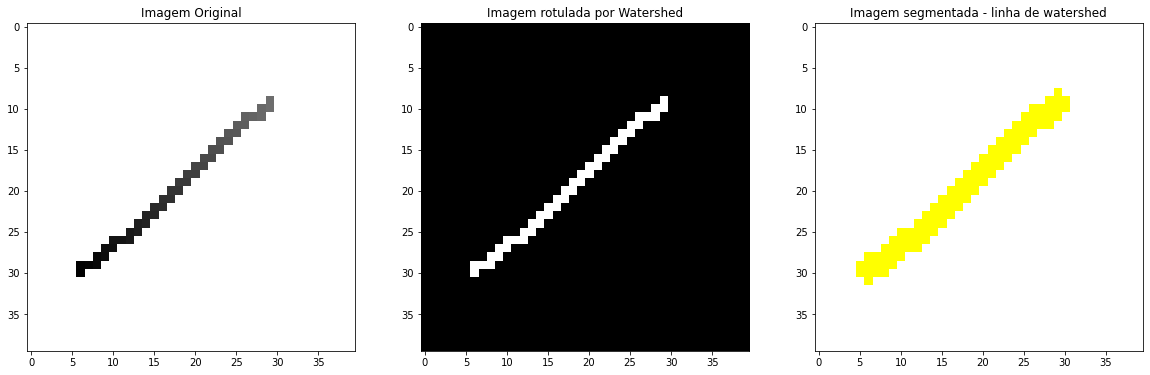

In [125]:
markers = np.zeros_like(img)
foreground, background = 1, 2 # rótulos para as sementes (objeto = 1 e fundo = 2)
markers[img < 100] = background 
markers[img > 240] = foreground

# Cálculo do watershed a partir da imagem e dos marcadores
w1 = watershed(img, markers)
plt.figure(1, figsize=(20,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1,3,2)
plt.imshow(w1, cmap='gray')
plt.title('Imagem rotulada por Watershed')
plt.subplot(1,3,3)
plt.imshow(mark_boundaries(img,w1))
plt.title('Imagem segmentada - linha de watershed')

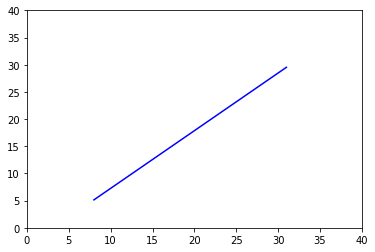

### 3. Algoritmo para detecção das formas básicas (retas/curvas)


* Detectar pontos de conexão (cantos) e descontinuidades nas formas


* Utilizar uma função de Fit para gerar as equações (podemos começar só com retas e equações de segundo grau) da reta/curva que interliga cada segmento 
entre 2 pontos



* Calcular o erro gerado por cada aproximação e escolher o menor
 	exemplo  P1 (35, 12)  ->    6.4x² - 2.65x + 0.12 	 ->   P2(52, 46)  
    
    
    
* Armazenar numa estrutura de dados os pontos e equações 




### 4.Plotar as formas
Pesquisar uma função de plot que plote uma equação num intervalo de 2 pontos
Iterar a função para todos os segmentos, plotando todos no mesmo gráfico

Exportar a imagem final (será que da pra fazer um pdf ou sgv?)

In [132]:
# Obtem os índices (edgeX e edgeY) de todos os pixels que representam bordas
edges = find_boundaries(img) 
edges_index = np.nonzero(edges == True)
edgeX = edges_index[0]
edgeY = np.flip(edges_index[1])              # flip para coincidir com a orientação do plot
#np.transpose(edges_index)                   # para observar melhor os indices

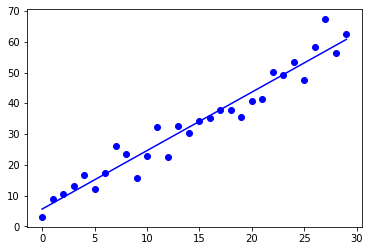

In [130]:
f = np.poly1d(p)                # So we can call f(x)
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(x, y, 'bo', label="Data")
plt.plot(x,f(x), 'b-',label="Polyfit")
plt.show()

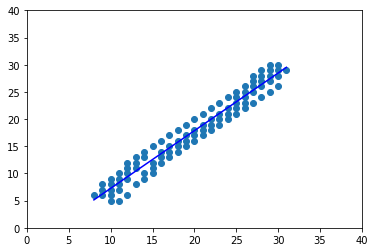

In [123]:
# Fit dos pontos
fit = np.polyfit(edgeX, edgeY, 1)       # O 1 representa o grau do polinomio usado no fit (funciona pra qualquer grau)
f = np.poly1d(fit)                      # Para poder chamar f(x)

# plota os pontos e a curva de ajuste
plt.xlim(0, img.shape[0])
plt.ylim(0, img.shape[1])
plt.plot(edgeX, edgeY, 'o', label="Data")            # plota os pontos das bordas
plt.plot(edgeX, f(edgeX), 'b-', label="Polyfit")     # plota o ajuste

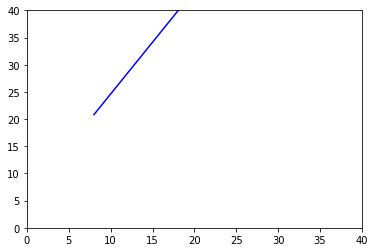

In [131]:
# a versao vetorizada ficaria assim: 
plt.xlim(0, img.shape[0])
plt.ylim(0, img.shape[1]) 
plt.plot(edgeX, f(edgeX), 'b-', label="Polyfit")

Alguns links que podem ajudar
http://www.imageprocessingplace.com/downloads_V3/root_downloads/tutorials/contour_tracing_Abeer_George_Ghuneim/moore.html
https://www.reddit.com/r/Python/comments/f2kv1/question_on_tracing_an_image_in_python_with_pil/
https://stackoverflow.com/questions/9137216/python-edge-detection-and-curvature-calculation
